# E-Commerce Sales Dataset

# Índice


- [Depuración de los datos de entrenamiento](#Depuración-de-los-datos-de-entrenamiento)
- [Análisis gráfico](#Análisis-gráfico)
- [Depuración de los datos test](#Depuración-de-los-datos-test)
- [Muestreo de datos](#Muestreo-de-datos)
- [Modelo final y predicción](#Modelo-final-y-predicción)

## Librerías y carga de archivo

In [1]:
import pandas as pd
import numpy as np

import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

import missingno as msno  

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

import sklearn.impute as skl_imp
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
sale_report_ = pd.read_csv('C:\\Users\\danie\\Desktop\\TFM\\Amazon Sale Report.csv')

In [3]:
sale_report_train, sale_report_test = train_test_split(sale_report_, test_size=0.2, random_state=54)

sale_report_test.to_csv('sale_report_test.csv', index=False) 

sale_report_train.to_csv('sale_report_train.csv', index=False)

Procedemos a depurar los datos de entrenamiento que acabamos de dividir. Para ello, ya hemos cargado el excel donde se han guardado los datos y renombramos las variables ya que algunas tenían espacios, por lo que aprovechamos y renombramos todas las demás para hacerlo más entendible.

In [4]:
sale_report_train.rename({'Order ID': 'ID_Pedido', 'Date': 'Fecha', 'Status': 'Estado_venta', 'Fulfilment': 'Cumplimiento', 
                    'Sales Channel ': 'Canal_venta', 'ship-service-level': 'Nivel_servicio', 'Style': 'Style', 
                    'SKU': 'SKU', 'Category': 'Categoria', 'Size': 'Talla', 'ASIN': 'ASIN', 
                    'Courier Status': 'Estado_mensajeria', 'Qty': 'Cantidad', 'currency': 'Divisa', 'Amount':'Importe',
                    'ship-city':'Ciudad', 'ship-state': 'Estado', 'ship-postal-code': 'Codigo_postal', 'ship-country': 'Pais',
                    'promotion-ids': 'Promocion', 'B2B': 'B2B', 'fulfilled-by': 'Cumplido_por'}, axis=1, inplace= True)

## Depuración de los datos de entrenamiento

En este proceso hay cuatro comprobaciones principales que debemos hacer sobre el dataset en cuestión. Estas son la **tipología de las variables**, los **valores mal codificados**, los **valores fuera de rango** y los factores con **categorías minoritarias**. 

Para comenzar, utilizaremos las funciones ```head()```, ```info()``` y ```nunique()```, que nos proporcionarán los primeros datos.

In [5]:
sale_report_train.head()

,index,ID_Pedido,Fecha,Estado_venta,Cumplimiento,Canal_venta,Nivel_servicio,Style,SKU,Categoria,...,Divisa,Importe,Ciudad,Estado,Codigo_postal,Pais,Promocion,B2B,Cumplido_por,Unnamed: 22
70951,70951,407-5196240-5441906,05-14-22,Cancelled,Merchant,Amazon.in,Standard,J0095,J0095-SET-XL,Set,...,INR,621.9,HYDERABAD,TELANGANA,500001.0,IN,NaN,False,Easy Ship,False
121464,121464,407-6385365-6840359,06-06-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0157,J0157-DR-L,Western Dress,...,INR,956.0,pune,MAHARASHTRA,411048.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False
96395,96395,407-2743590-4420328,06-25-22,Shipped,Amazon,Amazon.in,Expedited,J0008,J0008-SKD-L,Set,...,INR,1075.0,MULBAGAL,KARNATAKA,563131.0,IN,NaN,False,NaN,False
64300,64300,407-8825783-6029127,05-19-22,Shipped,Amazon,Amazon.in,Expedited,J0233,J0233-SKD-XXXL,Set,...,INR,1299.0,Ahemdabad,Gujarat,380058.0,IN,NaN,False,NaN,False
35014,35014,405-7659518-2763537,04-09-22,Shipped,Amazon,Amazon.in,Expedited,BL110,BL110-L,Blouse,...,INR,329.0,BENGALURU,KARNATAKA,560037.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN


Con ```head()``` podemos echar un primer vistazo general, pero utilizamos ```info()``` para observar el tipo de cada variable y ```nunique()``` para observar los valores únicos.

In [6]:
sale_report_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103180 entries, 70951 to 72815
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   index              103180 non-null  int64  
 1   ID_Pedido          103180 non-null  object 
 2   Fecha              103180 non-null  object 
 3   Estado_venta       103180 non-null  object 
 4   Cumplimiento       103180 non-null  object 
 5   Canal_venta        103180 non-null  object 
 6   Nivel_servicio     103180 non-null  object 
 7   Style              103180 non-null  object 
 8   SKU                103180 non-null  object 
 9   Categoria          103180 non-null  object 
 10  Talla              103180 non-null  object 
 11  ASIN               103180 non-null  object 
 12  Estado_mensajeria  97638 non-null   object 
 13  Cantidad           103180 non-null  int64  
 14  Divisa             96958 non-null   object 
 15  Importe            96958 non-null   float64
 16  Ciud

In [7]:
sale_report_train.nunique()

index                103180
ID_Pedido             97487
Fecha                    91
Estado_venta             12
Cumplimiento              2
Canal_venta               2
Nivel_servicio            2
Style                  1348
SKU                    6988
Categoria                 9
Talla                    11
ASIN                   6984
Estado_mensajeria         3
Cantidad                  9
Divisa                    1
Importe                1346
Ciudad                 8051
Estado                   67
Codigo_postal          8878
Pais                      1
Promocion              5236
B2B                       2
Cumplido_por              1
Unnamed: 22               1
dtype: int64

Antes que nada, nos podemos dar cuenta a simple vista de que hay variables que que no nos proporcionan información útil en un futuro modelo porque tienen un único valor. 

Estas variables son *Divisa*, *Unnamed:22* y *Pais*, que simplemente nos indican que estamos ante datos de la India donde la divisa es la rupia india, mientras que *Unnamed:22* directamente carece de sentido. Por otro lado tenemos *Canal_venta*, que lo único que nos dice es que el canal de venta es Amazon. Las eliminamos.


In [8]:
sale_report_train.drop(columns = ["index", "Divisa", "Canal_venta", "Pais", "Unnamed: 22"], inplace = True)

También podemos ver una variable *Fecha* como tipo object. Para sacarle utilidad a dicha variable, primero la convertiremos a tipo datetime y así posteriormente sacaremos de ella tres variables (*Mes*, *Dia* y *Año*). Esta última deberíamos pasarla a tipo int, aunque la vamos a eliminar porque tiene un único valor que nos indica que todos los datos que manejamos son de 2022.

In [9]:
sale_report_train["Fecha"] = pd.to_datetime(sale_report_train["Fecha"])

sale_report_train["Mes"] = sale_report_train.Fecha.apply(lambda x: x.strftime("%B"))
sale_report_train["Dia"] = sale_report_train.Fecha.apply(lambda x: x.strftime("%A"))
sale_report_train["Año"] = sale_report_train.Fecha.apply(lambda x: x.strftime("%Y"))
sale_report_train["Año"] = sale_report_train["Año"].astype(np.int64)

sale_report_train.drop(columns = ["Fecha", "Año"], inplace = True)

Volviendo al resultado obtenido con ```info()``` y ```nunique()```, hay evidentemente varias variables categóricas como tipo object. Las variables categóricas deben tener diez o menos valores únicos, pero en este caso hay dos variables cuya naturaleza se corresponde con una categórica pero que tienen 12 y 13 valores únicos. Las pasaremos también a tipo category y luego agruparemos categorías minoritarias para que cumplan la condición.

In [10]:
categorical = list(sale_report_train.loc[:,sale_report_train.nunique() <= 13]);  
categorical

['Estado_venta',
 'Cumplimiento',
 'Nivel_servicio',
 'Categoria',
 'Talla',
 'Estado_mensajeria',
 'Cantidad',
 'B2B',
 'Cumplido_por',
 'Mes',
 'Dia']

Como la variable *Cantidad* cumple la condición impuesta para crear la lista, es importante que la eliminemos antes de convertir todas las variables de dicha lista a tipo category, ya que esta se trata de una variable evidentemente numérica.

In [11]:
del categorical[6]

for column in categorical:
    sale_report_train[column] = sale_report_train[column].astype('category')

La variable *Codigo_postal* se muestra como tipo float (un número con decimales), cuando realmente se trata de una variable tipo object. Lo corregimos.

In [12]:
sale_report_train['Codigo_postal'] = sale_report_train['Codigo_postal'].astype('object')

Utilizamos ```info()``` para observar los tipos de las variables corregidos y ```describe()``` para sacar los descriptivos básicos, en este caso, de las variables nominales.

In [13]:
sale_report_train.info()
sale_report_train.describe(exclude=np.number)

<class 'pandas.core.frame.DataFrame'>
Index: 103180 entries, 70951 to 72815
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   ID_Pedido          103180 non-null  object  
 1   Estado_venta       103180 non-null  category
 2   Cumplimiento       103180 non-null  category
 3   Nivel_servicio     103180 non-null  category
 4   Style              103180 non-null  object  
 5   SKU                103180 non-null  object  
 6   Categoria          103180 non-null  category
 7   Talla              103180 non-null  category
 8   ASIN               103180 non-null  object  
 9   Estado_mensajeria  97638 non-null   category
 10  Cantidad           103180 non-null  int64   
 11  Importe            96958 non-null   float64 
 12  Ciudad             103152 non-null  object  
 13  Estado             103152 non-null  object  
 14  Codigo_postal      103152 non-null  object  
 15  Promocion          63752 non-null   

,ID_Pedido,Estado_venta,Cumplimiento,Nivel_servicio,Style,SKU,Categoria,Talla,ASIN,Estado_mensajeria,Ciudad,Estado,Codigo_postal,Promocion,B2B,Cumplido_por,Mes,Dia
count,103180,103180,103180,103180,103180,103180,103180,103180,103180,97638,103152,103152,103152.0,63752,103180,31448,103180,103180
unique,97487,12,2,2,1348,6988,9,11,6984,3,8051,67,8878.0,5236,2,1,4,7
top,403-4984515-8861958,Shipped,Amazon,Expedited,JNE3797,JNE3797-KR-L,Set,M,B09SDXFFQ1,Shipped,BENGALURU,MAHARASHTRA,201301.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Easy Ship,April,Sunday
freq,12,62206,71732,70842,3352,624,40291,18119,624,87516,8941,17872,814.0,36799,102477,31448,39273,15672


Otra cosa en la que podemos fijarnos es que la variable *Importe* está en rupias indias, así que quizás lo mejor sería pasarla a otra moneda, por ejemplo, a dólares estadounidenses, para tener una mayor familiarización con la moneda y comprender mejor los datos.

In [14]:
sale_report_train['Importe'] = sale_report_train['Importe'].apply(lambda x: x * 0.012)

Esta vez usaremos el ```describe()``` con las variables númericas, que nos informará sobre cuartiles, media, máximos... 

In [15]:
sale_report_train.describe()

,Cantidad,Importe
count,103180.000000,96958.000000
mean,0.904148,7.782351
std,0.312096,3.379065
min,0.000000,0.000000
25%,1.000000,5.388000
50%,1.000000,7.260000
75%,1.000000,9.456000
max,13.000000,67.008000


En principio ninguna de las dos variables tendría valores fuera de rango (es decir, los valores son normales), aunque sí que es cierto que es probable que ambas tengan una distribución asimétrica positiva porque el máximo es alto si lo comparamos con la media.

También debemos revisar si existen duplicados y eliminarlos.

In [16]:
sale_report_train.duplicated().sum()

3

In [17]:
sale_report_train.drop_duplicates(inplace= True)

Llegado a este punto, vamos a proceder a la agrupación de categorías minoritarias de las dos variables que pasaban el umbral de 10 valores únicos. Para ello, usamos la función ```value_counts()```, que nos muestra los valores de la variable y la frecuencia de cada uno de ellos.

1. **Talla**: una posible agrupación sería crear una categoría que englobe las tallas grandes, considerándose esta por ejemplo a partir de una 3XL.

In [18]:
sale_report_train.Talla.value_counts()

Talla
M       18118
L       17748
XL      16739
XXL     14488
S       13660
3XL     11823
XS       8930
6XL       585
5XL       447
4XL       340
Free      299
Name: count, dtype: int64

In [19]:
Tallas_grandes = ['3XL', '4XL', '5XL', '6XL']
sale_report_train['Talla'] = sale_report_train['Talla'].replace(Tallas_grandes, '3XL-6XL')

# Reemplazamos la categoría 'Free' por 'Talla_unica', que es a lo que se refiere el término
sale_report_train.Talla.replace('Free','Talla_unica',inplace=True)

In [20]:
sale_report_train.Talla.value_counts()

Talla
M              18118
L              17748
XL             16739
XXL            14488
S              13660
3XL-6XL        13195
XS              8930
Talla_unica      299
Name: count, dtype: int64

2. **Estado_venta**: vemos que el valor Shipped aparece tal cual y que luego hay otros valores que son como "subestados" de Shipped. Una posible agrupación sería juntar los valores de Shipped con menor frecuencia con la variable Shipped a secas en un nuevo valor Shipped - Other Status. 

In [21]:
sale_report_train.Estado_venta.value_counts()

Estado_venta
Shipped                          62205
Shipped - Delivered to Buyer     22959
Cancelled                        14727
Shipped - Returned to Seller      1572
Shipped - Picked Up                796
Pending                            523
Pending - Waiting for Pick Up      236
Shipped - Returning to Seller      112
Shipped - Out for Delivery          29
Shipped - Rejected by Buyer          8
Shipping                             7
Shipped - Lost in Transit            3
Name: count, dtype: int64

In [22]:
Shipped_ = ['Shipped', 'Shipped - Returning to Seller', 'Shipped - Rejected by Buyer', 'Shipped - Out for Delivery', 'Shipped - Lost in Transit', 
            'Shipped - Damaged']
sale_report_train['Estado_venta'] = sale_report_train['Estado_venta'].replace(Shipped_, 'Shipped - Other Status')

sale_report_train['Estado_venta'] = sale_report_train['Estado_venta'].cat.remove_categories('Shipping') #Eliminamos 'Shipping' ya que no tiene ningún registro

In [23]:
sale_report_train.Estado_venta.value_counts()

Estado_venta
Shipped - Other Status           62357
Shipped - Delivered to Buyer     22959
Cancelled                        14727
Shipped - Returned to Seller      1572
Shipped - Picked Up                796
Pending                            523
Pending - Waiting for Pick Up      236
Name: count, dtype: int64

También se ha realizado el ```value_counts()```de todas las demás variables para ver si había algo que destacar, y lo único destacable se encuentra en la variable *Cantidad*

In [24]:
sale_report_train.Cantidad.value_counts()

Cantidad
1     92603
0     10267
2       267
3        27
4         9
13        1
5         1
9         1
8         1
Name: count, dtype: int64

3. **Cantidad**: vemos que hay varios pedidos con 0 unidades de producto. Debemos analizar más a fondo, y para ello filtramos el dataset de forma que podamos visualizar el resto de variables cuando la variable *Cantidad* es 0 para ver si se cumple algún tipo de regla o patrón. 


In [25]:
df_cantidad = sale_report_train[sale_report_train['Cantidad'] == 0 ]
print(df_cantidad)

                  ID_Pedido Estado_venta Cumplimiento Nivel_servicio    Style  \
70951   407-5196240-5441906    Cancelled     Merchant       Standard    J0095   
24746   407-7883049-0289122    Cancelled     Merchant       Standard  JNE3294   
84900   408-2942316-2406712    Cancelled       Amazon      Expedited    J0145   
87458   407-9396397-6193939    Cancelled       Amazon      Expedited   SET347   
120431  403-4474948-4214759    Cancelled       Amazon      Expedited    J0002   
...                     ...          ...          ...            ...      ...   
102770  408-6820580-3369900    Cancelled     Merchant       Standard    J0009   
104990  408-2452696-0184335    Cancelled       Amazon      Expedited  MEN5002   
128903  406-3923120-4345139    Cancelled       Amazon      Expedited  JNE3801   
82818   406-9294183-5888310    Cancelled       Amazon      Expedited   SET278   
105797  406-4933280-8570750    Cancelled       Amazon      Expedited  JNE3614   

                     SKU Ca

Podemos observar que se corresponden con los pedidos que han sido cancelados, por lo que seguramente el sistema haya reajustado automáticamente a 0 unidades al realizarse la cancelación. Lo dejamos así.

## Valores atípicos y missings
Tras hacer todas las comprobaciones iniciales, el siguiente paso es gestionar los outliers y missings. Estos solo se gestionan de las input, es decir, tendremos que eliminar la variable objetivo *Cantidad*:

In [26]:
varObj = sale_report_train.Cantidad
imput = sale_report_train.drop(['Cantidad'],axis=1)

imput.head()

,ID_Pedido,Estado_venta,Cumplimiento,Nivel_servicio,Style,SKU,Categoria,Talla,ASIN,Estado_mensajeria,Importe,Ciudad,Estado,Codigo_postal,Promocion,B2B,Cumplido_por,Mes,Dia
70951,407-5196240-5441906,Cancelled,Merchant,Standard,J0095,J0095-SET-XL,Set,XL,B08CMN1K86,NaN,7.4628,HYDERABAD,TELANGANA,500001.0,NaN,False,Easy Ship,May,Saturday
121464,407-6385365-6840359,Shipped - Delivered to Buyer,Merchant,Standard,J0157,J0157-DR-L,Western Dress,L,B09831FVYR,Shipped,11.4720,pune,MAHARASHTRA,411048.0,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,June,Monday
96395,407-2743590-4420328,Shipped - Other Status,Amazon,Expedited,J0008,J0008-SKD-L,Set,L,B0894YB3B1,Shipped,12.9000,MULBAGAL,KARNATAKA,563131.0,NaN,False,NaN,June,Saturday
64300,407-8825783-6029127,Shipped - Other Status,Amazon,Expedited,J0233,J0233-SKD-XXXL,Set,3XL-6XL,B08XNHF3KB,Shipped,15.5880,Ahemdabad,Gujarat,380058.0,NaN,False,NaN,May,Thursday
35014,405-7659518-2763537,Shipped - Other Status,Amazon,Expedited,BL110,BL110-L,Blouse,L,B0928XH9S9,Shipped,3.9480,BENGALURU,KARNATAKA,560037.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,April,Saturday


### Valores atípicos o outliers
Además de que estos valores solo se gestionan para las input, solo se gestionan para las variables numéricas. Para gestionar los valores atípicos o outliers primero hay que distinguir si las variables son o no simétricas para, en caso negativo, aplicar otros criterios. Las asimetrías en valor absoluto mayores a la unidad son signo de distribución significativamente sesgada a la derecha/positiva (+) o izquierda/negativa (-)

In [27]:
imput.select_dtypes(include=np.number).apply(lambda x: x.skew())

Importe    0.904703
dtype: float64

La variable *Importe* no tiene asimetría. Seguimos con los missings.

### Missings
Tras la gestión de outliers el siguiente paso es calcular el porcentaje de registros que se encuentran perdidos y tomar medidas en base a dicha información. A continuación observamos los missings por variable:

In [28]:
imput.apply(lambda x: x.isna().sum()/len(x)*100)

ID_Pedido             0.000000
Estado_venta          0.006784
Cumplimiento          0.000000
Nivel_servicio        0.000000
Style                 0.000000
SKU                   0.000000
Categoria             0.000000
Talla                 0.000000
ASIN                  0.000000
Estado_mensajeria     5.371352
Importe               6.028475
Ciudad                0.027138
Estado                0.027138
Codigo_postal         0.027138
Promocion            38.212005
B2B                   0.000000
Cumplido_por         69.520339
Mes                   0.000000
Dia                   0.000000
dtype: float64

Hay varias variables con valores pérdidos, pero la que más me preocupa sin duda es la variable *Cumplido_por*, que sin duda habrá que eliminar del dataset porque no podemos "invertarnos" el 70% de los datos. No hay ningún otro aspecto preocupante en cuanto al resto de variables, que más adelante veremos cómo gestionamos. 

Ahora vamos a obtener el porcentaje de missings por observación, tarea para la que nos puede ser de utilidad crear una variable nueva en nuestro dataset que recoja este valor e incluirla en el modelo. 

In [29]:
imput['Prop_perdidos'] = imput.apply(lambda x: x.isna().sum()/imput.shape[1]*100,axis=1)

Ordenamos el dataset por esta nueva variable:

In [30]:
imput.sort_values(by='Prop_perdidos', ascending=False).head()

,ID_Pedido,Estado_venta,Cumplimiento,Nivel_servicio,Style,SKU,Categoria,Talla,ASIN,Estado_mensajeria,Importe,Ciudad,Estado,Codigo_postal,Promocion,B2B,Cumplido_por,Mes,Dia,Prop_perdidos
73911,405-3420451-5230744,Cancelled,Amazon,Expedited,SET374,SET374-KR-NP-M,Set,M,B09NDKJKPN,Cancelled,NaN,NaN,NaN,NaN,NaN,False,NaN,May,Wednesday,31.578947
84757,402-8651786-0683548,Shipped - Other Status,Amazon,Expedited,JNE3690,JNE3690-TU-XL,Top,XL,B094FKN153,Shipped,5.844,NaN,NaN,NaN,NaN,False,NaN,May,Wednesday,26.315789
13252,407-4532637-8415521,Cancelled,Merchant,Standard,JNE3405,JNE3405-KR-S,kurta,S,B081WX4G4Q,NaN,4.560,NaN,NaN,NaN,NaN,False,Easy Ship,April,Friday,26.315789
8752,406-4003386-8768363,Shipped - Other Status,Amazon,Expedited,JNE3376,JNE3376-KR-M,kurta,M,B082W7HW86,Shipped,5.184,NaN,NaN,NaN,NaN,False,NaN,April,Monday,26.315789
37964,407-3064376-9158743,Cancelled,Merchant,Standard,JNE3405,JNE3405-KR-S,kurta,S,B081WX4G4Q,NaN,4.560,NaN,NaN,NaN,NaN,False,Easy Ship,April,Friday,26.315789


Vemos que el porcentaje máximo de valores perdidos por observación es del 32% así que no nos resulta preocupante. Ahora vamos a proceder a la gestión de las variables:

1. **Cumplido_por**: vamos a eliminarla porque aproximadamente el 70% de sus registros son nulos y no tendría sentido realizar ninguna imputación.

In [31]:
imput.drop(columns = ["Cumplido_por"], inplace = True)

2. **Estado_mensajeria**: vamos a aplicar un filtro para ver el resto del dataset cuando *Estado_mensajeria* tiene valor nulo. De esta manera veremos si podemos asociar estos nulos con los valores de alguna otra variable y otorgarle algún sentido que nos permita gestionarlos.

In [32]:
imput['Estado_mensajeria'] = imput['Estado_mensajeria'].cat.add_categories([0])
imput['Estado_mensajeria'].fillna(0, inplace = True)
df_estado_mensajeria = imput[imput['Estado_mensajeria'] == 0 ]

print(df_estado_mensajeria)

                  ID_Pedido Estado_venta Cumplimiento Nivel_servicio    Style  \
70951   407-5196240-5441906    Cancelled     Merchant       Standard    J0095   
24746   407-7883049-0289122    Cancelled     Merchant       Standard  JNE3294   
29059   405-1452590-8005961    Cancelled     Merchant       Standard  JNE3568   
6542    404-7698665-6881131    Cancelled     Merchant       Standard  JNE3439   
94694   403-0384984-9877168    Cancelled     Merchant       Standard   SET291   
...                     ...          ...          ...            ...      ...   
17484   403-6072894-5146759    Cancelled     Merchant       Standard  JNE3440   
128875  403-9524128-9243508    Cancelled     Merchant       Standard  JNE3797   
98437   408-4733252-8190752    Cancelled     Merchant       Standard  JNE3887   
39591   407-2788278-8549951    Cancelled     Merchant       Standard  MEN5025   
102770  408-6820580-3369900    Cancelled     Merchant       Standard    J0009   

                     SKU   

Se puede observar que *Estado_mensajeria* tiene un valor nulo cuando *Estado_venta* es Cancelled, por lo que podemos suponer que los valores nulos realmente son Cancelled que se habían extraviado.

In [33]:
imput['Estado_mensajeria'].replace(0, 'Cancelled', inplace = True)

3. **Ciudad, Estado y Codigo_postal**: vemos que el número de nulos en las variables "Ciudad", "Estado" y "Codigo_postal" son los mismos, por lo que suponemos que son registros de los que se desconoce completamente la ubicación. Les asignaremos "Desconocido".

In [34]:
imput['Ciudad'].fillna('Desc', inplace = True)
imput['Estado'].fillna('Desc', inplace = True)
imput['Codigo_postal'].fillna('Desc', inplace = True)

4. **Promocion**: en la variable *Promocion* podemos suponer que los nulos se corresponden con los pedidos en los que no se ha utilizado ninguna promoción. Vamos a realizar un ```value_counts()``` para ver sus valores.

In [35]:
imput.Promocion.value_counts()

Promocion
IN Core Free Shipping 2015/04/08 23-48-5-108                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [36]:
imput['Promocion'].fillna('No promo', inplace = True)

Además, nos damos cuenta de que realmente la variable *Promocion* es categórica, ya que a pesar de tener 5.788 valores únicos si observamos sus valores vemos que estos se pueden agrupar perfectamente en cinco grupos principales. Realizamos dichas agrupaciones y cambiamos la variable a tipo 'category'

In [37]:
def agrupar_categorias(Promocion):
    if Promocion.startswith('Amazon'):
        return 'PLCC Free_Financing'
    elif Promocion.startswith('IN'):
        return 'IN Core Free Shipping'
    elif Promocion.startswith('Duplicated'):
        return 'Duplicated'
    elif Promocion.startswith('No'):
        return 'No promocion'
    else: 
        return 'Otros'

imput['Promocion'] = imput['Promocion'].apply(agrupar_categorias)

print(imput['Promocion'].value_counts())

Promocion
No promocion             39426
IN Core Free Shipping    36880
PLCC Free_Financing      25859
Duplicated                 731
Otros                      281
Name: count, dtype: int64


In [38]:
imput['Promocion'] = imput['Promocion'].astype('category')

5. **Estado_venta**: los nulos en esta variable apenas representan un 1% de los registros, por lo que lo más sencillo es eliminar las filas que contengan esos nulos con un riesgo insignificante de pérdida de información. 

In [39]:
imput.dropna(subset=['Estado_venta'], inplace=True)

6. **Importe**: como los nulos en esta variable representaran un porcentaje más alto, valoramos otras opciones como la imputación basada en la técnica de los k vecinos más cercanos para las variables numéricas.

In [40]:
import sklearn.impute as skl_imp
from sklearn.experimental import enable_iterative_imputer

In [41]:
imputer_knn = skl_imp.KNNImputer(n_neighbors=3)
importe_values = imput[['Importe']]
imputed_importe = imputer_knn.fit_transform(importe_values)
imput['Importe'] = imputed_importe

Observamos nuestro dataset totalmente depurado:

In [42]:
imput.apply(lambda x: x.isna().sum()/len(x)*100)

ID_Pedido            0.0
Estado_venta         0.0
Cumplimiento         0.0
Nivel_servicio       0.0
Style                0.0
SKU                  0.0
Categoria            0.0
Talla                0.0
ASIN                 0.0
Estado_mensajeria    0.0
Importe              0.0
Ciudad               0.0
Estado               0.0
Codigo_postal        0.0
Promocion            0.0
B2B                  0.0
Mes                  0.0
Dia                  0.0
Prop_perdidos        0.0
dtype: float64

In [43]:
imput.head()

,ID_Pedido,Estado_venta,Cumplimiento,Nivel_servicio,Style,SKU,Categoria,Talla,ASIN,Estado_mensajeria,Importe,Ciudad,Estado,Codigo_postal,Promocion,B2B,Mes,Dia,Prop_perdidos
70951,407-5196240-5441906,Cancelled,Merchant,Standard,J0095,J0095-SET-XL,Set,XL,B08CMN1K86,Cancelled,7.4628,HYDERABAD,TELANGANA,500001.0,No promocion,False,May,Saturday,10.526316
121464,407-6385365-6840359,Shipped - Delivered to Buyer,Merchant,Standard,J0157,J0157-DR-L,Western Dress,L,B09831FVYR,Shipped,11.4720,pune,MAHARASHTRA,411048.0,PLCC Free_Financing,False,June,Monday,0.000000
96395,407-2743590-4420328,Shipped - Other Status,Amazon,Expedited,J0008,J0008-SKD-L,Set,L,B0894YB3B1,Shipped,12.9000,MULBAGAL,KARNATAKA,563131.0,No promocion,False,June,Saturday,10.526316
64300,407-8825783-6029127,Shipped - Other Status,Amazon,Expedited,J0233,J0233-SKD-XXXL,Set,3XL-6XL,B08XNHF3KB,Shipped,15.5880,Ahemdabad,Gujarat,380058.0,No promocion,False,May,Thursday,10.526316
35014,405-7659518-2763537,Shipped - Other Status,Amazon,Expedited,BL110,BL110-L,Blouse,L,B0928XH9S9,Shipped,3.9480,BENGALURU,KARNATAKA,560037.0,IN Core Free Shipping,False,April,Saturday,5.263158


In [44]:
imput.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103170 entries, 70951 to 72815
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   ID_Pedido          103170 non-null  object  
 1   Estado_venta       103170 non-null  category
 2   Cumplimiento       103170 non-null  category
 3   Nivel_servicio     103170 non-null  category
 4   Style              103170 non-null  object  
 5   SKU                103170 non-null  object  
 6   Categoria          103170 non-null  category
 7   Talla              103170 non-null  category
 8   ASIN               103170 non-null  object  
 9   Estado_mensajeria  103170 non-null  category
 10  Importe            103170 non-null  float64 
 11  Ciudad             103170 non-null  object  
 12  Estado             103170 non-null  object  
 13  Codigo_postal      103170 non-null  object  
 14  Promocion          103170 non-null  category
 15  B2B                103170 non-null  

## Análisis gráfico

En este caso también vamos a obtener unas visualizaciones gráficas sencillas para saber más acerca de nuestro dataset.

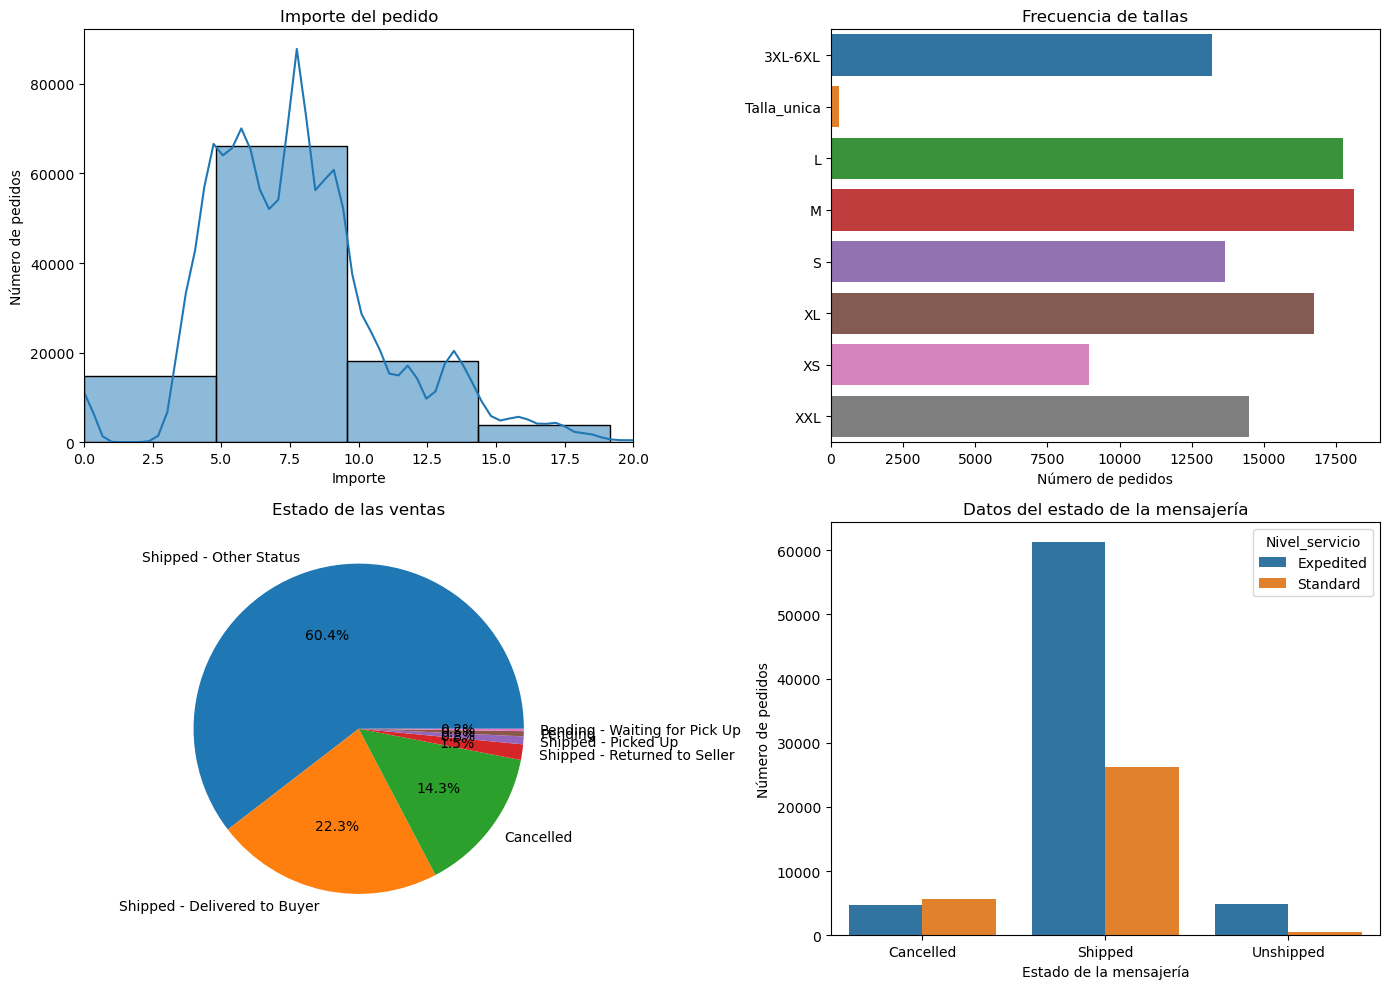

In [45]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10)) 

# Primer gráfico
sns.histplot(data=imput, x='Importe', kde=True, bins=14, ax=axs[0,0])
axs[0, 0].set_title('Importe del pedido')
axs[0, 0].set_xlabel('Importe')
axs[0, 0].set_ylabel('Número de pedidos')
axs[0, 0].set_xlim(0, 20)

# Segundo gráfico
sns.countplot(data=imput, y='Talla', ax=axs[0,1]) 
axs[0, 1].set_title('Frecuencia de tallas')
axs[0, 1].set_ylabel("")
axs[0, 1].set_xlabel('Número de pedidos')

# Tercer gráfico
conteo = imput['Estado_venta'].value_counts()

# Crear el gráfico circular
axs[1, 0].pie(conteo, labels=conteo.index, autopct='%1.1f%%')
axs[1, 0].set_title('Estado de las ventas')

# Cuarto gráfico
sns.countplot(data=imput, x='Estado_mensajeria', hue= 'Nivel_servicio', ax=axs[1,1])
axs[1, 1].set_title('Datos del estado de la mensajería')
axs[1, 1].set_ylabel('Número de pedidos')
axs[1, 1].set_xlabel('Estado de la mensajería')

plt.tight_layout() # función que ajusta los márgenes entre los gráficos

plt.show()

### Transformación de variables a numéricas
Vamos a proceder ahora a la codificación de todas las variables, de manera que finalmente nos queden de tipo numérico para poder realizar el posterior modelo con el que realizaremos la predicción. Ya sabemos que hay varias formas de transformar las variables.

In [46]:
# ID_Pedido: quitar los guiones, convertir a int usando la biblioteca numpy porque esta soporta números enteros grandes 

#imput['ID_Pedido'] = imput['ID_Pedido'].str.replace('-','')
#imput['ID_Pedido'] = imput['ID_Pedido'].astype(np.int64)

* **LabelEncoder()**: creamos una lista con las variables que vamos a codificar a través de esta función y luego recorremos la lista transformando a numérica cada valor gracias a la función ```fit_transform```

In [47]:
le = LabelEncoder()
variables_le = ['Estado_venta', 'Categoria', 'Promocion', 'Style', 'SKU', 'ASIN']
for m in variables_le:
    imput[m] = le.fit_transform(imput[m])

* **map()**: esta función nos permite asignarle un valor númerico personalizado a cada categoría a través de un diccionario. Es importante tener en cuenta que después de asignar estos valores la variable estará preparada para ser convertida a tipo int.

In [48]:
imput['Cumplimiento'] = imput['Cumplimiento'].map({'Amazon': 1, 'Merchant': 0})
imput['Nivel_servicio'] = imput['Nivel_servicio'].map({'Expedited': 1, 'Standard': 0})
imput['Estado_mensajeria'] = imput['Estado_mensajeria'].map({'Shipped': 1, 'Unshipped': 0, 'Cancelled': 2})
#imput['B2B'] = imput['B2B'].map({'True': 1, 'False': 0})

* **OrdinalEncoder()**: este método es adecuado para codificar variables categóricas ordinales, donde el orden es un factor importante.

In [49]:
oe = OrdinalEncoder()

oe_Dia = OrdinalEncoder(categories=[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]) 
imput['Dia'] = oe.fit_transform(imput[['Dia']])

oe_Mes = OrdinalEncoder(categories=[['March','April','May','June']])
imput['Mes'] = oe.fit_transform(imput[['Mes']])

oe_Talla = OrdinalEncoder(categories=[['S','M','L','XL','XXL','3XL-6XL','Talla_unica']])
imput['Talla'] = oe.fit_transform(imput[['Talla']])

* **astype()**: creamos una lista con las variables que vamos a pasar a tipo int con esta función. En esta lista introducimos todas las variables a las que en las celdas anteriores les hemos asignado valores numéricos y el resto de variables que nos quedaban por codificar de nuestro dataset.

In [50]:
cols_a_int = ['Cumplimiento', 'Nivel_servicio', 'Estado_mensajeria', 'B2B', 'Talla', 'Dia', 'Mes', 'Codigo_postal']
cols_a_round = ['Talla', 'Dia', 'Mes', 'Codigo_postal', 'Importe', 'Prop_perdidos']
imput[cols_a_round] = imput[cols_a_round].round(2)
imput['Codigo_postal'] = imput['Codigo_postal'].replace('Desc', 000000)
imput[cols_a_int] = imput[cols_a_int].astype(int)

* **Frequency encoding**: este método consiste en reemplazar cada categoría con el recuento de su frecuencia. Es ideal para aquellas variables que tienen demasiados valores únicos.

  Como se ha observado que hay numerosos valores dentro de esta variable que se repiten el mismo número de veces (lo que haría que recibieran el mismo valor numérico) lo que vamos a hacer es agrupar en este caso las ciudades y los estados que tengan un valor único.

In [51]:
frecuencia1 = imput['Ciudad'].value_counts()
ciudades_valor_unico = frecuencia1[frecuencia1 < 5130]
imput['Ciudad'] = imput['Ciudad'].apply(lambda x: 'Otras' if x in ciudades_valor_unico else x)

frecuencia2 = imput['Estado'].value_counts()
estado_valor_unico = frecuencia2[frecuencia2 < 9946]
imput['Estado'] = imput['Estado'].apply(lambda x: 'Otros' if x in estado_valor_unico else x)

imput['Ciudad'] = imput['Ciudad'].map(imput['Ciudad'].value_counts())
imput['Estado'] = imput['Estado'].map(imput['Estado'].value_counts())

Observamos el resultado:

In [52]:
imput.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103170 entries, 70951 to 72815
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ID_Pedido          103170 non-null  object 
 1   Estado_venta       103170 non-null  int32  
 2   Cumplimiento       103170 non-null  int32  
 3   Nivel_servicio     103170 non-null  int32  
 4   Style              103170 non-null  int32  
 5   SKU                103170 non-null  int32  
 6   Categoria          103170 non-null  int32  
 7   Talla              103170 non-null  int32  
 8   ASIN               103170 non-null  int32  
 9   Estado_mensajeria  103170 non-null  int32  
 10  Importe            103170 non-null  float64
 11  Ciudad             103170 non-null  int64  
 12  Estado             103170 non-null  int64  
 13  Codigo_postal      103170 non-null  int32  
 14  Promocion          103170 non-null  int32  
 15  B2B                103170 non-null  int32  
 16  Mes 

### Datos depurados y codificados, unimos a la target
Una vez todos los datos están depurados y codificados, lo que nos queda es unirlos a la target, es decir, a la variable objetivo. Es importante tener en cuenta que hemos eliminado filas para gestionar los missings de la variable *Estado_venta*, por lo que es crucial que eliminemos las mismas filas para la variable objetivo.

In [53]:
sale_report_target = sale_report_train
sale_report_target.dropna(subset=['Estado_venta'], inplace=True)
sale_report_target = sale_report_train[['ID_Pedido', 'Cantidad']]

# Guardamos en un excel la target "Cantidad" por ID
sale_report_target.to_csv('target_sale_report.csv', index = False)

In [54]:
sale_report_target.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103170 entries, 70951 to 72815
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ID_Pedido  103170 non-null  object
 1   Cantidad   103170 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


Juntamos el dataset depurado y el que acabamos de crear con la variable objetivo por ID.

In [55]:
training_values_target = pd.merge(imput, sale_report_target, on = "ID_Pedido", how = "left")

In [56]:
training_values_target.set_index('ID_Pedido', inplace=True)

No nos hace falta codificar la target porque ya es una variable tipo int

In [57]:
training_values_target

,Estado_venta,Cumplimiento,Nivel_servicio,Style,SKU,Categoria,Talla,ASIN,Estado_mensajeria,Importe,Ciudad,Estado,Codigo_postal,Promocion,B2B,Mes,Dia,Prop_perdidos,Cantidad
ID_Pedido,,,,,,,,,,,,,,,,,,,
407-5196240-5441906,0,0,0,177,629,5,5,1608,2,7.46,6408,71492,500001,2,0,3,2,10.53,0
407-6385365-6840359,3,0,0,231,937,7,1,3970,1,11.47,87822,17871,411048,4,0,1,1,0.00,1
407-2743590-4420328,4,1,1,112,354,5,1,1262,1,12.90,87822,13807,563131,2,0,1,2,10.53,1
407-8825783-6029127,4,1,1,299,1302,5,0,2757,1,15.59,87822,71492,380058,2,0,3,4,10.53,1
405-7659518-2763537,4,1,1,63,138,0,1,3452,1,3.95,8940,13807,560037,1,0,0,2,5.26,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402-1252447-3033103,4,1,1,282,1203,3,2,3949,1,9.49,87822,71492,751002,1,0,0,6,5.26,1
406-1854012-5828335,3,0,0,658,3224,8,5,2152,1,6.53,87822,17871,421001,4,0,3,3,0.00,1
406-9294183-5888310,0,1,1,1221,6174,5,7,4061,2,7.78,87822,71492,201306,2,0,3,4,15.79,0


**Se guardan los datos preprocesados en un csv**

In [58]:
training_values_target.to_csv("C:\\Users\\danie\\Desktop\\TFM\\TFM-Reproducible\\Sale Report\\procesado\\salereport_train_preprocessed.csv", index= False)

## Depuración de los datos test

Antes de realizar el modelo de predicción debemos depurar los datos de test tal y como hemos depurado los datos de entrenamiento. Para ello cargamos el excel donde se han guardado los datos y repetimos todo el proceso.

In [59]:
sale_report_test.rename({'Order ID': 'ID_Pedido', 'Date': 'Fecha', 'Status': 'Estado_venta', 'Fulfilment': 'Cumplimiento', 
                    'Sales Channel ': 'Canal_venta', 'ship-service-level': 'Nivel_servicio', 'Style': 'Style', 
                    'SKU': 'SKU', 'Category': 'Categoria', 'Size': 'Talla', 'ASIN': 'ASIN', 
                    'Courier Status': 'Estado_mensajeria', 'Qty': 'Cantidad', 'currency': 'Divisa', 'Amount':'Importe',
                    'ship-city':'Ciudad', 'ship-state': 'Estado', 'ship-postal-code': 'Codigo_postal', 'ship-country': 'Pais',
                    'promotion-ids': 'Promocion', 'B2B': 'B2B', 'fulfilled-by': 'Cumplido_por'}, axis=1, inplace= True)

In [60]:
sale_report_test.head()

,index,ID_Pedido,Fecha,Estado_venta,Cumplimiento,Canal_venta,Nivel_servicio,Style,SKU,Categoria,...,Divisa,Importe,Ciudad,Estado,Codigo_postal,Pais,Promocion,B2B,Cumplido_por,Unnamed: 22
76504,76504,402-0424416-5169145,05-09-22,Shipped,Amazon,Amazon.in,Expedited,JNE2205,JNE2205-KR-467-A-XXXL,kurta,...,INR,356.0,VISAKHAPATNAM,ANDHRA PRADESH,530013.0,IN,NaN,False,NaN,False
32185,32185,404-6920467-2129930,04-11-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3546,JNE3546-KR-L,kurta,...,INR,458.0,PUNE,MAHARASHTRA,411043.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
102139,102139,404-3958319-2885914,06-20-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0152,J0152-DR-L,Western Dress,...,INR,845.0,CHENNAI,TAMIL NADU,600020.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False
37170,37170,405-4580013-5361162,04-08-22,Shipped,Amazon,Amazon.in,Expedited,JNE3399,JNE3399-KR-XS,kurta,...,INR,435.0,SALEM,TAMIL NADU,636001.0,IN,NaN,False,NaN,NaN
14578,14578,404-2737275-5447529,04-21-22,Shipped,Amazon,Amazon.in,Expedited,JNE3613,JNE3613-KR-L,kurta,...,INR,399.0,DALTONGANJ,JHARKHAND,822101.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN


In [61]:
sale_report_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25795 entries, 76504 to 31685
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              25795 non-null  int64  
 1   ID_Pedido          25795 non-null  object 
 2   Fecha              25795 non-null  object 
 3   Estado_venta       25795 non-null  object 
 4   Cumplimiento       25795 non-null  object 
 5   Canal_venta        25795 non-null  object 
 6   Nivel_servicio     25795 non-null  object 
 7   Style              25795 non-null  object 
 8   SKU                25795 non-null  object 
 9   Categoria          25795 non-null  object 
 10  Talla              25795 non-null  object 
 11  ASIN               25795 non-null  object 
 12  Estado_mensajeria  24465 non-null  object 
 13  Cantidad           25795 non-null  int64  
 14  Divisa             24222 non-null  object 
 15  Importe            24222 non-null  float64
 16  Ciudad             2579

In [62]:
sale_report_test.nunique()

index                25795
ID_Pedido            25393
Fecha                   91
Estado_venta            13
Cumplimiento             2
Canal_venta              2
Nivel_servicio           2
Style                 1169
SKU                   5137
Categoria                9
Talla                   11
ASIN                  5134
Estado_mensajeria        3
Cantidad                 6
Divisa                   1
Importe                977
Ciudad                3765
Estado                  50
Codigo_postal         5343
Pais                     1
Promocion             2448
B2B                      2
Cumplido_por             1
Unnamed: 22              1
dtype: int64

In [63]:
sale_report_test.drop(columns = ["index", "Divisa", "Canal_venta", "Pais", "Unnamed: 22"], inplace = True)

In [64]:
sale_report_test["Fecha"] = pd.to_datetime(sale_report_test["Fecha"])

sale_report_test["Mes"] = sale_report_test.Fecha.apply(lambda x: x.strftime("%B"))
sale_report_test["Dia"] = sale_report_test.Fecha.apply(lambda x: x.strftime("%A"))
sale_report_test["Año"] = sale_report_test.Fecha.apply(lambda x: x.strftime("%Y"))
sale_report_test["Año"] = sale_report_test["Año"].astype(np.int64)

sale_report_test.drop(columns = ["Fecha", "Año"], inplace = True)

In [65]:
categorical = list(sale_report_test.loc[:,sale_report_test.nunique() <= 13]);  
categorical

['Estado_venta',
 'Cumplimiento',
 'Nivel_servicio',
 'Categoria',
 'Talla',
 'Estado_mensajeria',
 'Cantidad',
 'B2B',
 'Cumplido_por',
 'Mes',
 'Dia']

In [66]:
del categorical[6]

for column in categorical:
    sale_report_test[column] = sale_report_test[column].astype('category')

In [67]:
sale_report_test['Codigo_postal'] = sale_report_test['Codigo_postal'].astype('object')

In [68]:
sale_report_test.info()
sale_report_test.describe(exclude=np.number)

<class 'pandas.core.frame.DataFrame'>
Index: 25795 entries, 76504 to 31685
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   ID_Pedido          25795 non-null  object  
 1   Estado_venta       25795 non-null  category
 2   Cumplimiento       25795 non-null  category
 3   Nivel_servicio     25795 non-null  category
 4   Style              25795 non-null  object  
 5   SKU                25795 non-null  object  
 6   Categoria          25795 non-null  category
 7   Talla              25795 non-null  category
 8   ASIN               25795 non-null  object  
 9   Estado_mensajeria  24465 non-null  category
 10  Cantidad           25795 non-null  int64   
 11  Importe            24222 non-null  float64 
 12  Ciudad             25790 non-null  object  
 13  Estado             25790 non-null  object  
 14  Codigo_postal      25790 non-null  object  
 15  Promocion          16070 non-null  object  
 16  B2B  

,ID_Pedido,Estado_venta,Cumplimiento,Nivel_servicio,Style,SKU,Categoria,Talla,ASIN,Estado_mensajeria,Ciudad,Estado,Codigo_postal,Promocion,B2B,Cumplido_por,Mes,Dia
count,25795,25795,25795,25795,25795,25795,25795,25795,25795,24465,25790,25790,25790.0,16070,25795,7829,25795,25795
unique,25393,13,2,2,1169,5137,9,11,5134,3,3765,50,5343.0,2448,2,1,4,7
top,171-9095417-7292313,Shipped,Amazon,Expedited,JNE3797,JNE3797-KR-L,Set,M,B09SDXFFQ1,Shipped,BENGALURU,MAHARASHTRA,201301.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Easy Ship,April,Sunday
freq,4,15598,17966,17773,872,149,9993,4592,149,21971,2276,4388,192.0,9301,25627,7829,9794,3947


In [69]:
sale_report_test['Importe'] = sale_report_test['Importe'].apply(lambda x: x * 0.012)

Esta vez usaremos el ```describe()``` con las variables númericas, que nos informará sobre cuartiles, media, máximos... 

In [70]:
sale_report_test.describe()

,Cantidad,Importe
count,25795.000000,24222.000000
mean,0.905563,7.784285
std,0.318339,3.356434
min,0.000000,0.000000
25%,1.000000,5.388000
50%,1.000000,7.258560
75%,1.000000,9.456000
max,15.000000,32.376000


In [71]:
sale_report_test.duplicated().sum()

0

In [72]:
sale_report_test.drop_duplicates(inplace= True)

1. **Talla**

In [73]:
sale_report_test.Talla.value_counts()

Talla
M       4592
L       4383
XL      4136
XXL     3608
S       3430
3XL     2993
XS      2231
6XL      153
5XL      103
4XL       87
Free      79
Name: count, dtype: int64

In [74]:
Tallas_grandes = ['3XL', '4XL', '5XL', '6XL']
sale_report_test['Talla'] = sale_report_test['Talla'].replace(Tallas_grandes, '3XL-6XL')

# Reemplazamos la categoría 'Free' por 'Talla_unica', que es a lo que se refiere el término
sale_report_test.Talla.replace('Free','Talla_unica',inplace=True)

In [75]:
sale_report_test.Talla.value_counts()

Talla
M              4592
L              4383
XL             4136
XXL            3608
S              3430
3XL-6XL        3336
XS             2231
Talla_unica      79
Name: count, dtype: int64

2. **Estado_venta**

In [76]:
sale_report_test.Estado_venta.value_counts()

Estado_venta
Shipped                          15598
Shipped - Delivered to Buyer      5810
Cancelled                         3603
Shipped - Returned to Seller       381
Shipped - Picked Up                177
Pending                            135
Pending - Waiting for Pick Up       45
Shipped - Returning to Seller       33
Shipped - Out for Delivery           6
Shipped - Rejected by Buyer          3
Shipped - Lost in Transit            2
Shipped - Damaged                    1
Shipping                             1
Name: count, dtype: int64

In [77]:
Shipped_ = ['Shipped', 'Shipped - Returning to Seller', 'Shipped - Rejected by Buyer', 'Shipped - Out for Delivery', 'Shipped - Lost in Transit', 
            'Shipped - Damaged']
sale_report_test['Estado_venta'] = sale_report_test['Estado_venta'].replace(Shipped_, 'Shipped - Other Status')

sale_report_test['Estado_venta'] = sale_report_test['Estado_venta'].cat.remove_categories('Shipping') #Eliminamos 'Shipping' ya que no tiene ningún registro

In [78]:
sale_report_test.Estado_venta.value_counts()

Estado_venta
Shipped - Other Status           15643
Shipped - Delivered to Buyer      5810
Cancelled                         3603
Shipped - Returned to Seller       381
Shipped - Picked Up                177
Pending                            135
Pending - Waiting for Pick Up       45
Name: count, dtype: int64

In [79]:
sale_report_test.Cantidad.value_counts()

Cantidad
1     23176
0      2538
2        74
3         5
5         1
15        1
Name: count, dtype: int64

3. **Cantidad**


In [80]:
df_cantidad = sale_report_test[sale_report_test['Cantidad'] == 0 ]
print(df_cantidad)

                  ID_Pedido Estado_venta Cumplimiento Nivel_servicio    Style  \
13282   404-7269327-8145966    Cancelled       Amazon      Expedited   SET184   
63624   402-3386194-3830762    Cancelled     Merchant       Standard   BTM043   
40801   406-4154203-7396316    Cancelled     Merchant       Standard   SET183   
7337    406-2851982-3618760    Cancelled     Merchant       Standard  MEN5001   
42595   171-8605762-0017940    Cancelled       Amazon      Expedited  JNE3567   
...                     ...          ...          ...            ...      ...   
120900  406-7254766-2710724    Cancelled       Amazon      Expedited  JNE3579   
118161  408-5906661-2988333    Cancelled     Merchant       Standard  JNE3797   
9072    404-6353044-6230723    Cancelled       Amazon      Expedited   SET278   
34963   405-4176633-5485956    Cancelled       Amazon      Expedited   SET366   
31685   405-3141252-5135511    Cancelled     Merchant       Standard    J0117   

                     SKU   

## Valores atípicos y missings

In [81]:
varObj = sale_report_test.Cantidad
imput_test = sale_report_test.drop(['Cantidad'],axis=1)

imput_test.head()

,ID_Pedido,Estado_venta,Cumplimiento,Nivel_servicio,Style,SKU,Categoria,Talla,ASIN,Estado_mensajeria,Importe,Ciudad,Estado,Codigo_postal,Promocion,B2B,Cumplido_por,Mes,Dia
76504,402-0424416-5169145,Shipped - Other Status,Amazon,Expedited,JNE2205,JNE2205-KR-467-A-XXXL,kurta,3XL-6XL,B07FVMT2G5,Shipped,4.272,VISAKHAPATNAM,ANDHRA PRADESH,530013.0,NaN,False,NaN,May,Monday
32185,404-6920467-2129930,Shipped - Delivered to Buyer,Merchant,Standard,JNE3546,JNE3546-KR-L,kurta,L,B08HHJRFQP,Shipped,5.496,PUNE,MAHARASHTRA,411043.0,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,April,Monday
102139,404-3958319-2885914,Shipped - Delivered to Buyer,Merchant,Standard,J0152,J0152-DR-L,Western Dress,L,B08V197XLZ,Shipped,10.140,CHENNAI,TAMIL NADU,600020.0,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,June,Monday
37170,405-4580013-5361162,Shipped - Other Status,Amazon,Expedited,JNE3399,JNE3399-KR-XS,kurta,XS,B082W8DNQX,Shipped,5.220,SALEM,TAMIL NADU,636001.0,NaN,False,NaN,April,Friday
14578,404-2737275-5447529,Shipped - Other Status,Amazon,Expedited,JNE3613,JNE3613-KR-L,kurta,L,B08XVFSDR2,Shipped,4.788,DALTONGANJ,JHARKHAND,822101.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,April,Thursday


### Valores atípicos o outliers

In [82]:
imput_test.select_dtypes(include=np.number).apply(lambda x: x.skew())

Importe    0.807112
dtype: float64

### Missings

In [83]:
imput_test.apply(lambda x: x.isna().sum()/len(x)*100)

ID_Pedido             0.000000
Estado_venta          0.003877
Cumplimiento          0.000000
Nivel_servicio        0.000000
Style                 0.000000
SKU                   0.000000
Categoria             0.000000
Talla                 0.000000
ASIN                  0.000000
Estado_mensajeria     5.156038
Importe               6.098081
Ciudad                0.019384
Estado                0.019384
Codigo_postal         0.019384
Promocion            37.701105
B2B                   0.000000
Cumplido_por         69.649157
Mes                   0.000000
Dia                   0.000000
dtype: float64

In [84]:
imput_test['Prop_perdidos'] = imput_test.apply(lambda x: x.isna().sum()/imput_test.shape[1]*100,axis=1)

In [85]:
imput_test.sort_values(by='Prop_perdidos', ascending=False).head()

,ID_Pedido,Estado_venta,Cumplimiento,Nivel_servicio,Style,SKU,Categoria,Talla,ASIN,Estado_mensajeria,Importe,Ciudad,Estado,Codigo_postal,Promocion,B2B,Cumplido_por,Mes,Dia,Prop_perdidos
124215,405-0340492-2359532,Cancelled,Amazon,Expedited,JNE3465,JNE3465-KR-L,kurta,L,B08BFLKNGJ,Unshipped,5.892,NaN,NaN,NaN,NaN,False,NaN,June,Saturday,26.315789
73772,406-7680604-5439529,Shipped - Other Status,Amazon,Expedited,PJNE3368,PJNE3368-KR-4XL,kurta,3XL-6XL,B09PY691XK,Shipped,10.428,NaN,NaN,NaN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,May,Wednesday,21.052632
107957,S02-1023968-2239723,NaN,Amazon,Standard,J0008,J0008-SKD-XL,Set,XL,B0894X711G,Unshipped,NaN,Surat,Gujarat,394210.0,NaN,False,NaN,June,Wednesday,21.052632
98062,171-1461942-4857123,Cancelled,Amazon,Expedited,J0349,J0349-SET-L,Set,L,B099NMQR6C,Cancelled,NaN,"THANE(W), thane",MAHARASHTRA,400615.0,NaN,False,NaN,June,Thursday,15.789474
75779,171-5173728-8341156,Cancelled,Merchant,Standard,JNE3703,JNE3703-KR-M,kurta,M,B099FCVXXD,NaN,NaN,PRODDATUR,ANDHRA PRADESH,516360.0,NaN,False,Easy Ship,May,Tuesday,15.789474


1. **Cumplido_por**

In [86]:
imput_test.drop(columns = ["Cumplido_por"], inplace = True)

2. **Estado_mensajeria**

In [87]:
imput_test['Estado_mensajeria'] = imput_test['Estado_mensajeria'].cat.add_categories([0])
imput_test['Estado_mensajeria'].fillna(0, inplace = True)
df_estado_mensajeria = imput_test[imput_test['Estado_mensajeria'] == 0 ]

print(df_estado_mensajeria)

                  ID_Pedido Estado_venta Cumplimiento Nivel_servicio    Style  \
63624   402-3386194-3830762    Cancelled     Merchant       Standard   BTM043   
40801   406-4154203-7396316    Cancelled     Merchant       Standard   SET183   
7337    406-2851982-3618760    Cancelled     Merchant       Standard  MEN5001   
69934   404-8699922-5281155    Cancelled     Merchant       Standard   SET377   
112444  402-9235557-2730732    Cancelled     Merchant       Standard  JNE3797   
...                     ...          ...          ...            ...      ...   
8962    171-6514723-6694747    Cancelled     Merchant       Standard   SET288   
60817   406-6262880-8897146    Cancelled     Merchant       Standard   SET397   
16055   406-6248521-9005133    Cancelled     Merchant       Standard    J0117   
118161  408-5906661-2988333    Cancelled     Merchant       Standard  JNE3797   
31685   405-3141252-5135511    Cancelled     Merchant       Standard    J0117   

                      SKU  

In [88]:
imput_test['Estado_mensajeria'].replace(0, 'Cancelled', inplace = True)

3. **Ciudad, Estado y Codigo_postal**

In [89]:
imput_test['Ciudad'].fillna('Desc', inplace = True)
imput_test['Estado'].fillna('Desc', inplace = True)
imput_test['Codigo_postal'].fillna('Desc', inplace = True)

4. **Promocion**

In [90]:
imput_test.Promocion.value_counts()

Promocion
IN Core Free Shipping 2015/04/08 23-48-5-108                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [91]:
imput_test['Promocion'].fillna('No promo', inplace = True)

In [92]:
def agrupar_categorias(Promocion):
    if Promocion.startswith('Amazon'):
        return 'PLCC Free_Financing'
    elif Promocion.startswith('IN'):
        return 'IN Core Free Shipping'
    elif Promocion.startswith('Duplicated'):
        return 'Duplicated'
    elif Promocion.startswith('No'):
        return 'No promocion'
    else: 
        return 'Otros'

imput_test['Promocion'] = imput_test['Promocion'].apply(agrupar_categorias)

print(imput_test['Promocion'].value_counts())

Promocion
No promocion             9725
IN Core Free Shipping    9317
PLCC Free_Financing      6489
Duplicated                191
Otros                      73
Name: count, dtype: int64


In [93]:
imput_test['Promocion'] = imput_test['Promocion'].astype('category')

5. **Estado_venta**

In [94]:
imput_test.dropna(subset=['Estado_venta'], inplace=True)

6. **Importe**

In [95]:
imputer_knn = skl_imp.KNNImputer(n_neighbors=3)
importe_values_ = imput_test[['Importe']]
imputed_importe_ = imputer_knn.fit_transform(importe_values_)
imput_test['Importe'] = imputed_importe_

In [96]:
imput_test.apply(lambda x: x.isna().sum()/len(x)*100)

ID_Pedido            0.0
Estado_venta         0.0
Cumplimiento         0.0
Nivel_servicio       0.0
Style                0.0
SKU                  0.0
Categoria            0.0
Talla                0.0
ASIN                 0.0
Estado_mensajeria    0.0
Importe              0.0
Ciudad               0.0
Estado               0.0
Codigo_postal        0.0
Promocion            0.0
B2B                  0.0
Mes                  0.0
Dia                  0.0
Prop_perdidos        0.0
dtype: float64

In [97]:
imput_test.head()

,ID_Pedido,Estado_venta,Cumplimiento,Nivel_servicio,Style,SKU,Categoria,Talla,ASIN,Estado_mensajeria,Importe,Ciudad,Estado,Codigo_postal,Promocion,B2B,Mes,Dia,Prop_perdidos
76504,402-0424416-5169145,Shipped - Other Status,Amazon,Expedited,JNE2205,JNE2205-KR-467-A-XXXL,kurta,3XL-6XL,B07FVMT2G5,Shipped,4.272,VISAKHAPATNAM,ANDHRA PRADESH,530013.0,No promocion,False,May,Monday,10.526316
32185,404-6920467-2129930,Shipped - Delivered to Buyer,Merchant,Standard,JNE3546,JNE3546-KR-L,kurta,L,B08HHJRFQP,Shipped,5.496,PUNE,MAHARASHTRA,411043.0,PLCC Free_Financing,False,April,Monday,0.000000
102139,404-3958319-2885914,Shipped - Delivered to Buyer,Merchant,Standard,J0152,J0152-DR-L,Western Dress,L,B08V197XLZ,Shipped,10.140,CHENNAI,TAMIL NADU,600020.0,PLCC Free_Financing,False,June,Monday,0.000000
37170,405-4580013-5361162,Shipped - Other Status,Amazon,Expedited,JNE3399,JNE3399-KR-XS,kurta,XS,B082W8DNQX,Shipped,5.220,SALEM,TAMIL NADU,636001.0,No promocion,False,April,Friday,10.526316
14578,404-2737275-5447529,Shipped - Other Status,Amazon,Expedited,JNE3613,JNE3613-KR-L,kurta,L,B08XVFSDR2,Shipped,4.788,DALTONGANJ,JHARKHAND,822101.0,IN Core Free Shipping,False,April,Thursday,5.263158


In [98]:
imput_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25794 entries, 76504 to 31685
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   ID_Pedido          25794 non-null  object  
 1   Estado_venta       25794 non-null  category
 2   Cumplimiento       25794 non-null  category
 3   Nivel_servicio     25794 non-null  category
 4   Style              25794 non-null  object  
 5   SKU                25794 non-null  object  
 6   Categoria          25794 non-null  category
 7   Talla              25794 non-null  category
 8   ASIN               25794 non-null  object  
 9   Estado_mensajeria  25794 non-null  category
 10  Importe            25794 non-null  float64 
 11  Ciudad             25794 non-null  object  
 12  Estado             25794 non-null  object  
 13  Codigo_postal      25794 non-null  object  
 14  Promocion          25794 non-null  category
 15  B2B                25794 non-null  category
 16  Mes  

### Transformación de variables a numéricas

* **LabelEncoder()**

In [99]:
le = LabelEncoder()
variables_le = ['Estado_venta', 'Categoria', 'Promocion', 'Style', 'SKU', 'ASIN']
for m in variables_le:
    imput_test[m] = le.fit_transform(imput_test[m])

* **map()**

In [100]:
imput_test['Cumplimiento'] = imput_test['Cumplimiento'].map({'Amazon': 1, 'Merchant': 0})
imput_test['Nivel_servicio'] = imput_test['Nivel_servicio'].map({'Expedited': 1, 'Standard': 0})
imput_test['Estado_mensajeria'] = imput_test['Estado_mensajeria'].map({'Shipped': 1, 'Unshipped': 0, 'Cancelled': 2})
#imput['B2B'] = imput['B2B'].map({'True': 1, 'False': 0})

* **OrdinalEncoder()**

In [101]:
oe = OrdinalEncoder()

oe_Dia = OrdinalEncoder(categories=[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]) 
imput_test['Dia'] = oe.fit_transform(imput_test[['Dia']])

oe_Mes = OrdinalEncoder(categories=[['March','April','May','June']])
imput_test['Mes'] = oe.fit_transform(imput_test[['Mes']])

oe_Talla = OrdinalEncoder(categories=[['S','M','L','XL','XXL','3XL-6XL','Talla_unica']])
imput_test['Talla'] = oe.fit_transform(imput_test[['Talla']])

* **astype()**

In [102]:
cols_a_int = ['Cumplimiento', 'Nivel_servicio', 'Estado_mensajeria', 'B2B', 'Talla', 'Dia', 'Mes', 'Codigo_postal']
cols_a_round = ['Talla', 'Dia', 'Mes', 'Codigo_postal', 'Importe', 'Prop_perdidos']
imput_test[cols_a_round] = imput_test[cols_a_round].round(2)
imput_test['Codigo_postal'] = imput_test['Codigo_postal'].replace('Desc', 000000)
imput_test[cols_a_int] = imput_test[cols_a_int].astype(int)

* **Frequency encoding**

In [103]:
frecuencia1 = imput_test['Ciudad'].value_counts()
ciudades_valor_unico = frecuencia1[frecuencia1 < 5130]
imput_test['Ciudad'] = imput_test['Ciudad'].apply(lambda x: 'Otras' if x in ciudades_valor_unico else x)

frecuencia2 = imput_test['Estado'].value_counts()
estado_valor_unico = frecuencia2[frecuencia2 < 9946]
imput_test['Estado'] = imput_test['Estado'].apply(lambda x: 'Otros' if x in estado_valor_unico else x)

imput_test['Ciudad'] = imput_test['Ciudad'].map(imput_test['Ciudad'].value_counts())
imput_test['Estado'] = imput_test['Estado'].map(imput_test['Estado'].value_counts())

In [104]:
imput_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25794 entries, 76504 to 31685
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID_Pedido          25794 non-null  object 
 1   Estado_venta       25794 non-null  int32  
 2   Cumplimiento       25794 non-null  int32  
 3   Nivel_servicio     25794 non-null  int32  
 4   Style              25794 non-null  int32  
 5   SKU                25794 non-null  int32  
 6   Categoria          25794 non-null  int32  
 7   Talla              25794 non-null  int32  
 8   ASIN               25794 non-null  int32  
 9   Estado_mensajeria  25794 non-null  int32  
 10  Importe            25794 non-null  float64
 11  Ciudad             25794 non-null  int64  
 12  Estado             25794 non-null  int64  
 13  Codigo_postal      25794 non-null  int32  
 14  Promocion          25794 non-null  int32  
 15  B2B                25794 non-null  int32  
 16  Mes                2579

In [105]:
imput_test.set_index('ID_Pedido', inplace=True)

**Se guardan los datos preprocesados en un csv**

In [106]:
imput_test.to_csv("C:\\Users\\danie\\Desktop\\TFM\\TFM-Reproducible\\Sale Report\\procesado\\salereport_test_preprocessed.csv", index= False)

## Muestreo de datos
Una vez terminado el preprocesado, lo que queremos es realizar un muestreo estratificado de nuestros datos.  Para ello nos ayudamos de la función ```train_test_split()```, con la que indicamos nuestras X e Y de train y test. 

In [107]:
training_values_target.Cantidad.value_counts()

Cantidad
1     105526
0      11672
2        349
3         39
4         18
13         1
5          1
9          1
8          1
Name: count, dtype: int64

In [108]:
cantidad_counts = training_values_target.Cantidad.value_counts()

to_remove = cantidad_counts[cantidad_counts == 1].index

new_training_values_target = training_values_target[~training_values_target.Cantidad.isin(to_remove)]

# Dividir el conjunto de datos filtrado en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    new_training_values_target.drop('Cantidad', axis=1),
    new_training_values_target.Cantidad,
    test_size=0.2,
    random_state=0,
    stratify=new_training_values_target.Cantidad
)

Una vez definidas nuestras X e Y de train y test, el siguiente paso es construir un modelo analítico que nos permita predecir la cantidad de cada producto. Vamos a utilizar diferentes criterios para predecir, obteniendo el accuracy de cada uno de ellos que será lo que nos permitirá saber cuál es el mejor.*

In [109]:
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve, classification_report

In [110]:
tree_mod = DecisionTreeClassifier(criterion="gini").fit(X_train, y_train)
tree_pred = tree_mod.predict(X_test)
print(classification_report(y_test, tree_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2334
           1       1.00      1.00      1.00     21105
           2       0.51      0.34      0.41        70
           3       0.25      0.38      0.30         8
           4       0.00      0.00      0.00         4

    accuracy                           0.99     23521
   macro avg       0.55      0.54      0.54     23521
weighted avg       0.99      0.99      0.99     23521



In [111]:
classifier2 = RandomForestClassifier().fit(X_train, y_train)
pred2 = classifier2.predict(X_test)
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2334
           1       1.00      1.00      1.00     21105
           2       0.45      0.19      0.26        70
           3       0.25      0.25      0.25         8
           4       0.00      0.00      0.00         4

    accuracy                           0.99     23521
   macro avg       0.54      0.48      0.50     23521
weighted avg       0.99      0.99      0.99     23521



In [112]:
classifier3 = LinearSVC(penalty='l1', dual= False).fit(X_train, y_train)
pred3 = classifier3.predict(X_test)
print(classification_report(y_test, pred3))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2334
           1       1.00      1.00      1.00     21105
           2       0.00      0.00      0.00        70
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         4

    accuracy                           1.00     23521
   macro avg       0.40      0.40      0.40     23521
weighted avg       0.99      1.00      0.99     23521



In [113]:
classifier4 = LogisticRegression(max_iter=10000).fit(X_train, y_train)
pred4 = classifier4.predict(X_test)
print(classification_report(y_test, pred4))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00      2334
           1       0.90      1.00      0.95     21105
           2       0.00      0.00      0.00        70
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         4

    accuracy                           0.90     23521
   macro avg       0.38      0.20      0.19     23521
weighted avg       0.90      0.90      0.85     23521



## Modelo final y predicción
Definiremos entonces el modelo con el que vamos a predecir:

In [114]:
prediccion = classifier3.predict(imput_test)
prediccion = (pd.DataFrame(prediccion,columns=['Cantidad'],index=imput_test.index))
prediccion.sort_values(by=['Cantidad'],ascending=False,axis=0,inplace=True)

In [115]:
prediccion

,Cantidad
ID_Pedido,
402-0424416-5169145,1
403-4357826-9377934,1
406-4294288-1374736,1
406-3405844-7542758,1
171-9368643-4137150,1
...,...
402-9228360-8117943,0
403-4920319-1661129,0
403-9281128-6587508,0
